In [4]:
#Generate predictive function fitten over CSV data
import pandas as pd
from sklearn.linear_model import LinearRegression

def fit_predictive_function(csv_file, series_column, target_column, forward_date):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Extract the series and target columns
    series = data[series_column].values.reshape(-1, 1)
    target = data[target_column].values
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(series, target)
    
    # Predict future values
    forward_values = model.predict([[forward_date]])
    
    return forward_values[0]



#use in model
csv_file = "sample_data.csv"
series_column = "Series"
target_column = "Target"
forward_date = 25  # Replace with the desired forward date

result = fit_predictive_function(csv_file, series_column, target_column, forward_date)
print(f"Predicted value for {forward_date} is: {result}")


Predicted value for 25 is: 41.42723849645088


In [ ]:
#Generate sample CSV data
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=20, freq="D")
series_values = np.arange(len(date_range))
target_values = 2 * series_values + np.random.normal(scale=5, size=len(date_range))

# Create a DataFrame
data = pd.DataFrame({"Date": date_range, "Series": series_values, "Target": target_values})

# Save the DataFrame to a CSV file
data.to_csv("sample_data.csv", index=False)

print("Sample CSV file created: sample_data.csv")


Predicted value for 25 is: 41.42723849645088


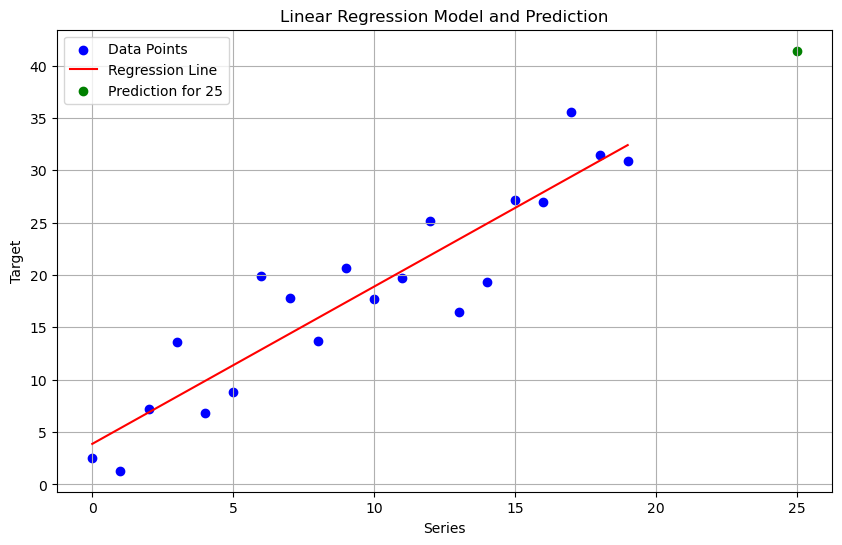

In [1]:
#Plot chart
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def fit_predictive_function(csv_file, series_column, target_column, forward_date):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Extract the series and target columns
    series = data[series_column].values.reshape(-1, 1)
    target = data[target_column].values
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(series, target)
    
    # Predict future values
    forward_values = model.predict([[forward_date]])
    
    return model, series, target, forward_values[0]

# Use in model
csv_file = "sample_data.csv"  # Replace with your actual CSV file path
series_column = "Series"
target_column = "Target"
forward_date = 25  # Replace with the desired forward date

model, series, target, predicted_value = fit_predictive_function(csv_file, series_column, target_column, forward_date)
print(f"Predicted value for {forward_date} is: {predicted_value}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(series, target, color='blue', label='Data Points')
plt.plot(series, model.predict(series), color='red', label='Regression Line')
plt.scatter([forward_date], [predicted_value], color='green', label=f'Prediction for {forward_date}')
plt.title('Linear Regression Model and Prediction')
plt.xlabel('Series')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


Predicted value for 50 is: 8.979715042573279


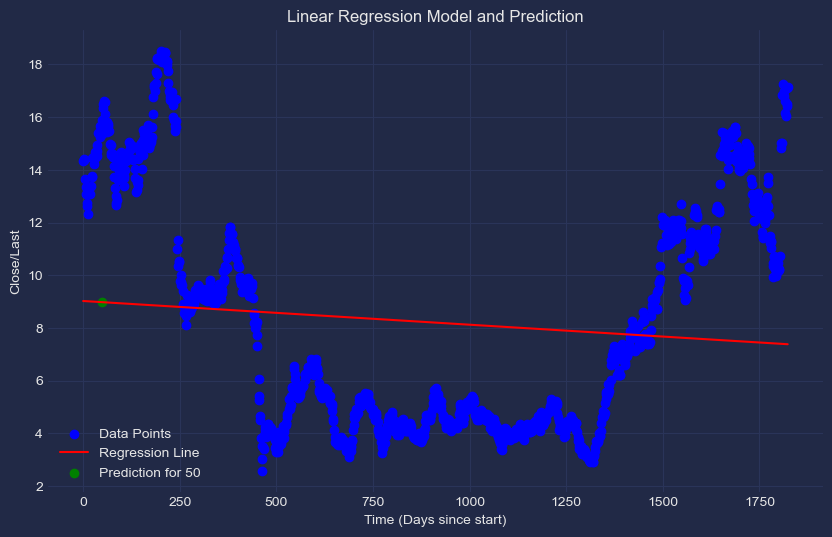

In [5]:
#Use real values, not sample
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

def fit_predictive_function(csv_file, forward_date):
    # Read the CSV file
    data = pd.read_csv(csv_file)
    
    # Convert 'Date' to a numerical format (days since start)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Time'] = (data['Date'] - data['Date'].min()).dt.days

    # Extract the series and target columns
    series = data['Time'].values.reshape(-1, 1)
    target = data['Close/Last'].values
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(series, target)
    
    # Predict future values
    forward_values = model.predict([[forward_date]])
    
    return model, series, target, forward_values[0]

# Use in model
csv_file = r"F:\tools\supermodels\ypf.csv"  # Replace with your actual CSV file path
forward_date = 50  # Replace with the desired forward date (in days since start)

model, series, target, predicted_value = fit_predictive_function(csv_file, forward_date)
print(f"Predicted value for {forward_date} is: {predicted_value}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(series, target, color='blue', label='Data Points')
plt.plot(series, model.predict(series), color='red', label='Regression Line')
plt.scatter([forward_date], [predicted_value], color='green', label=f'Prediction for {forward_date}')
plt.title('Linear Regression Model and Prediction')
plt.xlabel('Time (Days since start)')
plt.ylabel('Close/Last')
plt.legend()
plt.grid(True)
plt.show()
